In [9]:
import sys, os, requests, json, re,  matplotlib.pyplot as plt
from collections import Counter
from pylab import *

cwd = os.getcwd()
os.chdir(cwd)
months = [i for i in range(1,2)]
year = 2016

for j in months:
    url = 'http://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(j)+'.json?api-key=7cef684da20b471faf5c47266f122516'
    resp = requests.get(url)
    data = json.loads(resp.text)
    mon = '0'+str(j) if j < 10 else str(j)
    with open('archive_'+str(year)+'_'+mon+'.json','w') as fp:
        json.dump(data,fp)

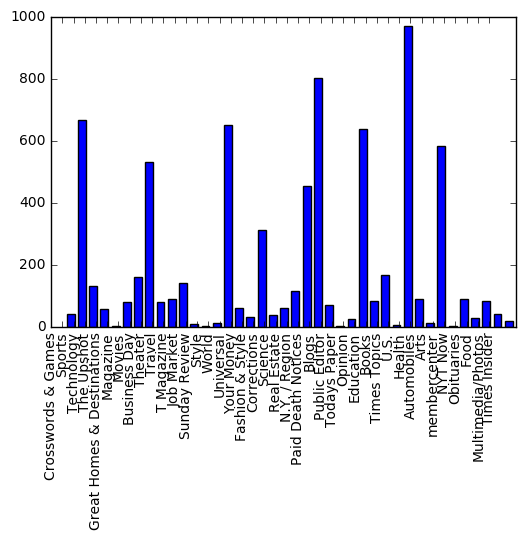

In [10]:
#number of articles in a particular section
with open('archive_2016_01.json') as df:
    data = json.load(df)

sectionName = []
typeOfMaterial = []
source = []
for i in range(len(data["response"]["docs"])):
    temp = data["response"]["docs"][i]["section_name"]
    sectionName.append(str(temp.encode('ascii','ignore').decode('ascii')))
    temp = data["response"]["docs"][i]["type_of_material"]
    typeOfMaterial.append(str(temp.encode('ascii','ignore').decode('ascii')))
    temp = data["response"]["docs"][i]["source"]
    source.append(str(temp.encode('ascii','ignore').decode('ascii')))

counter1 = Counter(sectionName)
names1 = counter1.keys()
counts1 = counter1.values()
indexes = arange(len(names1))
width = 0.7
plt.bar(indexes, counts1, width)
plt.xticks(indexes - width * 2, names1, rotation=90)
plt.show()

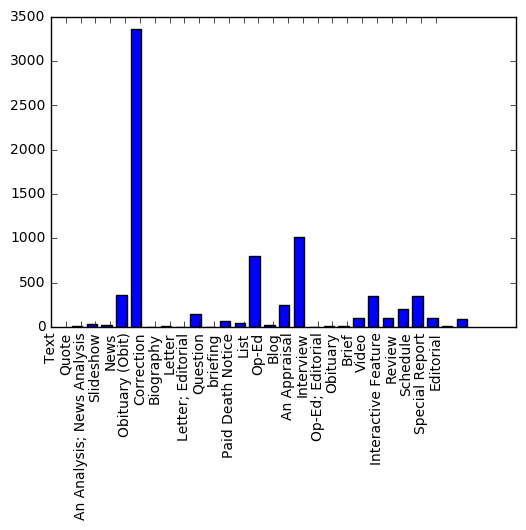

News reported by people = 68.28% of the total news.


In [11]:
#segments reported by people 
counter2 = Counter(typeOfMaterial)
names2 = counter2.keys()
counts2 = counter2.values()

indexes = arange(len(names2))
width = 0.7
plt.bar(indexes, counts2, width)
plt.xticks(indexes - width * 2, names2, rotation=90)
plt.show()

count = 0
for i in range(len(data["response"]["docs"])):
    if data["response"]["docs"][i]["byline"]:
        temp = data["response"]["docs"][i]["byline"]["person"]
        if temp:
            count += 1
total = round(float(counts3)*10000/float(len(data["response"]["docs"])))/100
print('News reported by people = '+str(total)+'% of the total news.')

In [12]:
#retrieve the most shared articles from the NYT within 
#the past 30 days and determine which author has contributed the most articles
import csv
auth_key =('7cef684da20b471faf5c47266f122516') 
url = 'http://api.nytimes.com/svc/mostpopular/v2/mostshared/all-sections/30.json?api-key='+str(auth_key)
response = requests.get(url)
content  = response.json()
for k, v in content.items():
    if (k == "results"):
        for a in v:
            for i,r in a.items():
                print( i, r)

#The fields we want are 'total_shares', 'byline', and, in the interest of fairness, 'published_date'
#for each article, we'll extract the desired fields and add them to lists
dater = []
shares = []
authors = []
for k, v in content.items():
    if (k == "results"):
        for a in v:
            pubdate = a["published_date"]
            dater.append(pubdate)
            author = a["byline"]
            authors.append(author)
            sharecount = a["total_shares"]
            shares.append(sharecount)
csv_out = open('nyt_mostpop_week.csv', 'w')
mywriter = csv.writer(csv_out)

#give the csv column headers
mywriter.writerow(["Author", "Publish Date", "Total Shares"])
#stitch the three lists together and write each line of the new stitched table as a row in the csv
for row in zip(authors,dater,shares):
	mywriter.writerow(row)
csv_out.close()

total_shares 1
geo_facet ['RUSSIA']
media [{'type': 'image', 'subtype': 'photo', 'media-metadata': [{'format': 'Standard Thumbnail', 'width': 75, 'height': 75, 'url': 'https://static01.nyt.com/images/2017/02/15/us/15intercepts/15intercepts-thumbStandard.jpg'}, {'format': 'mediumThreeByTwo210', 'width': 210, 'height': 140, 'url': 'https://static01.nyt.com/images/2017/02/15/us/15intercepts/15intercepts-mediumThreeByTwo210.jpg'}, {'format': 'mediumThreeByTwo440', 'width': 440, 'height': 293, 'url': 'https://static01.nyt.com/images/2017/02/15/us/15intercepts/15intercepts-mediumThreeByTwo440.jpg'}], 'caption': 'Paul Manafort, Mr. Trump’s former campaign chairman, at the Republican National Convention in Cleveland in July.', 'copyright': 'Sam Hodgson for The New York Times'}]
url http://www.nytimes.com/2017/02/14/us/politics/russia-intelligence-communications-trump.html
source The New York Times
title Trump Campaign Aides Had Repeated Contacts With Russian Intelligence
section U.S.
abstract 